
# Project: Investigate a Dataset (No-Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</uld>


<a id='intro'></a>
## Introduction

> No-show appointments dataset has been collected from 100k medical appointments information in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. I downloaded it from the link provided in Project details (Kaggle website).
A number of
characteristics about the patient are
included in each row which some of them need to be clarified as below:

> ● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

> ● ‘Neighborhood’ indicates the
location of the hospital.

> ● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

> ● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

> The dataset was loaded and assessed quickly to see the size, format, data type and whether it needs any cleaning, filtering, etc. After completing Data wrangling step in which assured the dataset works, Exploratory Data Analysis was done to understand the data in more detail and get what it says. All the above mentioned processes are going to answer these three questions in detail:
- Q1: Are people with pre existing consitions showing up to their appointments at a higher rate?
- Q2: Does the time difference between booking and the appointment has any effect on people showing up?
- Q3: How sending or not sending an SMS can impact on missing an appointment?




First things first,to start the project, the packages that might be required are loaded as below:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

At this step, the dataset is loaded and printed out a couple of line to get more familiar with the appearnace.

In [2]:
# Data set is loaded and seen
df_noshow=pd.read_csv('KaggleV2-May-2016.csv')
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


At a glance, I'm not cofortable with "PatientId", "ScheduledDay" and "AppointmentDay" columns as they don't look like what are expected to be so the next step is going through the dataset in more detail.

In [3]:
# Size of the dataset
df_noshow.shape

(110527, 14)

This showed the size of the dataset which includes 110527 rows and 14 columns.

In [4]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Here, I showed the general information of the dataset and the data-type for each variable.

First, obviously there is no missing data.

Second, the data-types of columns "PatientId", "ScheduledDay" and "AppointmentDay" should be changed since PatientId should be Integer and the other two columns must be in Date-Time format.

In [5]:
# Data type correction for columns "PatientId", "ScheduledDay" and "AppointmentDay" and test it.
df_noshow['PatientId']=df_noshow['PatientId'].astype('int64')
df_noshow['ScheduledDay']=pd.to_datetime(df_noshow['ScheduledDay'])
df_noshow['AppointmentDay']=pd.to_datetime(df_noshow['AppointmentDay'])
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), int64(9), object(3)
memory usage: 11.8+ MB


"PatientId" was converted to Integer datatype and "ScheduledDay", "AppointmentDay" columns have been changed to date-time format.

In [6]:
# Number of unique entries in each field
df_noshow.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Here, It shows that "AppointmentID" is the only column with no duplicates so It can be the Primary Key of the dataset. It is useful if the dataset suppose to be combined with other data files. Below,  the result of the code shows that there is no duplicated row in dataset.

In [7]:
# Check if there is duplicated row
sum(df_noshow.duplicated())

0

In [8]:
# Simple and quick check of the data statistics
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The dataset statistics shows that there are patients with distinct ages ranging from new born to 115 years old with average of 37 years old. On the other hand, "Scholarship", "Hipertension",	"Diabetes",	"Alcoholism" and "SMS_received" columns are all    booly data type (0 and 1). "Handcap" is a discrete value between 0 to 4.

Obviously, there is an error in "Age" values since the min shows -1 which can not be correct. So, let see how big is this issue.

In [9]:
# How many rows have "Age" values below 0.
df_noshow[df_noshow['Age']< 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
# Removing the row with "Age" value below 0.
df_noshow = df_noshow[df_noshow.Age >= 0]

In [11]:
# Test to prove there is no value less than 0 for "Age".
df_noshow['Age'].min()

0

There is only one row with Age value of "-1" which is incorrect so It was removed from the data set.

Now, the dataset is ready to be explored.

<a id='eda'></a>
## Exploratory Data Analysis

The dataset needs more investigation to explore distinct parameters and their relationships prior to jumping in to the specific questions and their answers.

Data visualization by making some graphs is very good idea to get the better understanding of the dataset and its elements which will be quite helpful to draw our questions and conclusions.

Below, there examples of the graphs have been drawn to find the relationship between different parameters.

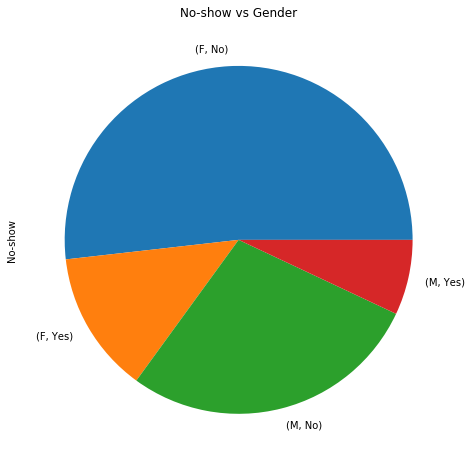

In [12]:
# Number of people who showed up with regards their gender.
df_noshow.groupby('Gender') ['No-show'].value_counts().plot(kind='pie', title='No-show vs Gender', figsize=(8,8));

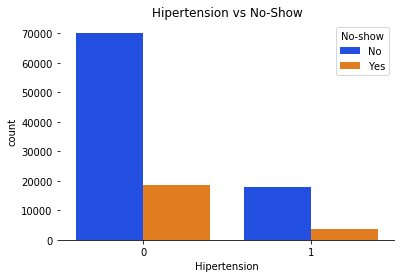

In [13]:
# Number of people who showed up with or without Hipertension. Seaborn library has been used.
sns.countplot('Hipertension',data=df_noshow,palette='bright',hue='No-show').set_title("Hipertension vs No-Show");
sns.despine(left=True)

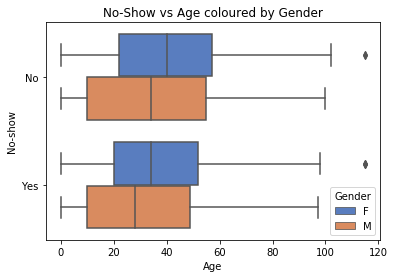

In [14]:
# Age of the people who showed up or did not with regards their gender. Seaborn library has been used.
sns.boxplot(x="Age", y="No-show", data=df_noshow, hue='Gender',palette='muted').set_title("No-Show vs Age coloured by Gender");

After investigating the relatioship between different parameters with No-show, then there is an idea that the time difference between the Scheduled and Appointment days might be meaningful in terms of the patient's show up. Let's dig in a bit more.

In [15]:
#Making a new field in the dataset by calculating the time difference (time_diff) between the Scheduled day and Appointment day.
df_noshow['time_diff']=df_noshow['AppointmentDay'].apply(pd.Timestamp.date) -df_noshow['ScheduledDay'].apply(pd.Timestamp.date) 

In [16]:
# Test the dataset with regards the 'time_diff' creation and its datatype.
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110526 non-null int64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
time_diff         110526 non-null timedelta64[ns]
dtypes: datetime64[ns, UTC](2), int64(9), object(3), timedelta64[ns](1)
memory usage: 18.5+ MB


In [17]:
# Check inside 'time_diff' to see whether there is any isue.
df_noshow['time_diff'].describe()

count                     110526
mean     10 days 04:24:39.789370
std      15 days 06:07:14.979140
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: time_diff, dtype: object

Again, the time between the scheduled and Appointment days can not have negative value since Appointment days always are later or at the same day of the scheduled days. So the data set needs to be cleaned to address this issue.

In [18]:
#lets find the negative times delta rows in time_diff. They don't have any physical meaning and must be deleted
df_noshow[df_noshow['time_diff']<'0 days']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_diff
27033,7839272661752,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1 days
55226,7896293967868,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1 days
64175,24252258389979,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1 days
71533,998231581612122,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6 days
72362,3787481966821,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1 days


In [19]:
#dropping negative time_diff rows
df_noshow.drop([27033,55226,64175,71533,72362], inplace = True)

In [20]:
# Test to make sure there is no negative value in 'time_diff'.
df_noshow['time_diff'].min()

Timedelta('0 days 00:00:00')

# How to test if any of the data columns has an effect on the No-show rate:

Hypothesis testing is a valuable statistical tool to test our idea.

## Making inferences about all the patients who go to the clinic
considering this is a sample dataset from the total population of the paitients who go to the clinic, we can use this data to make inferences about the population. We are going to use the hypothesis testing to compare the proportion(rate) of no_show in a variety of circumstances to understand what parameteres can be considered significant enough to effect the no_show rate based on our sample set.

### Comparing 2 Population Proportions
### Hypothesis testing
Our basic assumptions will typically be:

H0:p1=p2

H1:p1>p2 

or

H0:p1=p2

H1:p1<p2

we always use the industry accepted significance level of 5%:

alpha = 5%

    which means, ZL=Z0.05=1.645

In [22]:
# Hypothesis test function

def proportion_hyp_test(x1,x2,n1,n2):
    
    """Compares the success ratio of 2 population with 95% confidence
     x1= success frequency in population 1
     x2= success frequency in population 2
     n1= number of data points in population 1
     n2= number of data points in population 2"""
    
    PooledProp = (x1+x2)/(n1+n2)
    p1=x1/n1
    p2=x2/n2
    denominator = PooledProp*(1-PooledProp)*(1/n1+1/n2)
    if denominator<0:
        print('wrong input data, make sure numbers are correct and', 
              'you have follow this sequence: x1, x2,n1,n2')
        return
    
    Zstat= (p1-p2)/math.sqrt(PooledProp*(1-PooledProp)*(1/n1+1/n2))
    if Zstat>1.645:
        print('Statistically Speaking, Population 1 has significantly higher proportion than Population 2')
    elif Zstat<-1.645:
        print('Statistically Speaking, Population 2 has significantly higher proportion than Population 1')
    else:
        print('At95% confidence level, Population 1 and Population 2 are not statistically different') 
    return

In [23]:
df_noshow.groupby(['Diabetes']) ['No-show'].value_counts()

Diabetes  No-show
0         No         81694
          Yes        20884
1         No          6513
          Yes         1430
Name: No-show, dtype: int64

In [24]:
# Population 1: Non-Diabetese and no show, Population 2: Diabetes and no shows
proportion_hyp_test(x1=20889,n1=81695+20889,x2=1430,n2=1430+6513)

Statistically Speaking, Population 1 has significantly higher proportion than Population 2


In [25]:
df_noshow.groupby(['Hipertension']) ['No-show'].value_counts()

Hipertension  No-show
0             No         70178
              Yes        18542
1             No         18029
              Yes         3772
Name: No-show, dtype: int64

In [26]:
# Population 1: Non-Hypertension and no show, Population 2: Hypertension and no shows
proportion_hyp_test(x1=18547,n1=18547+70179,x2=3772,n2=18029+3772)

Statistically Speaking, Population 1 has significantly higher proportion than Population 2


In [27]:
df_noshow.groupby(['Scholarship']) ['No-show'].value_counts()

Scholarship  No-show
0            No         79924
             Yes        19736
1            No          8283
             Yes         2578
Name: No-show, dtype: int64

In [28]:
# Population 1: Non-Scholarship and no show, Population 2: Scholarship and no shows
proportion_hyp_test(x1=19741,n1=19741+79925,x2=2578,n2=2578+8283)

Statistically Speaking, Population 2 has significantly higher proportion than Population 1


### Q1: Are people with pre existing consitions showing up to their appointments at a higher rate?

If patient's known problems are having no-scholarships, having hypertension and having diabetes, we already know that a patient with each one of these problems has a lower chace of missing their appointments. 

Now, we want to know if having more problems equates lower rate of missing an appointment. In other words, if a patient has 2 of the above problems, is it reasonable to think that she/he has a lower chance of missing an appointment?

To do it, we compare these populations:

- Population 1: People with no problems

- Population 2: People with one of the 3 possible problems

- Population 3: People with 2 of the 3 possible problems

- Population 4: People with all 3 problems

In [29]:
# Number of people who showed up with regards of Diabetes, Hipertension and whether they have Scholarship. This is used in hypothesis test.
df_noshow.groupby(['Scholarship', 'Hipertension', 'Diabetes']) ['No-show'].value_counts()

Scholarship  Hipertension  Diabetes  No-show
0            0             0         No         62343
                                     Yes        16082
                           1         No          1064
                                     Yes          254
             1             0         No         11514
                                     Yes         2347
                           1         No          5003
                                     Yes         1053
1            0             0         No          6667
                                     Yes         2171
                           1         No           104
                                     Yes           35
             1             0         No          1170
                                     Yes          284
                           1         No           342
                                     Yes           88
Name: No-show, dtype: int64

In [30]:
x1=2171
n1=6667+x1
x2=16087+35+284
n2=62344+104+1170+x2
x3=254+2347+88
n3=1064+11514+342+x3
x4=1053
n4=5003+x4

In [31]:
proportion_hyp_test(x1,x2,n1,n2)

Statistically Speaking, Population 1 has significantly higher proportion than Population 2


In [32]:
proportion_hyp_test(x2,x3,n2,n3)

Statistically Speaking, Population 1 has significantly higher proportion than Population 2


In [33]:
proportion_hyp_test(x3,x4,n3,n4)

At95% confidence level, Population 1 and Population 2 are not statistically different


### Answer of Q1
Yes, there is a clear relationship between the show up rate and the pre existing health problems.
- we can see that peaple with at least one known problem have a higher chance of showing up to their appointments. 
- Interestingly, if a patient has 2 known problems, then he/she is significantly higher chance of showing up to the appointment
- However, there is no difference between patients with 2 or 3 known problems in terms of showing up to their appointments

### Q2: Does the time difference between booking and the appointment has any effect on people showing up?

- The time_diff column with time_delta format needs to be converted to a numeric parameter, representing number of days between booking and the appointment and use it to create a flag for diffent time legnths.
- this flag will be used in grouping no_show data and will be investigated to see if peaple who have booked at an earlier dates are more likely not to show up to their appointments

In [34]:
# Remove any other characters in the 'time_diff' values than number of the days.
df_noshow['time_diff']=df_noshow['time_diff'].astype('str').apply(lambda x: x.replace('days', '').replace(' ', '').replace('00:00:00.000000000',''))

In [35]:
# Convert the data type from time_delta to Integer
df_noshow['time_diff']=df_noshow['time_diff'].astype(int)

In [36]:
# Test the datatype change above.
df_noshow['time_diff'].dtypes

dtype('int32')

In [37]:
# Make a new column named 'time_diff_flag' to categorize the 'time_diff'
flag=df_noshow['time_diff'].copy(deep=True)
#flag= np.where(flag < 1, np.nan, flag)
flag[(flag>=1) & (flag<=7)] = 7
flag[(flag>=8) & (flag<31)] =30
flag[(flag>=31)]=90

flag.replace(0, 'SameDay', inplace = True)
flag.replace(7, 'Week', inplace = True)
flag.replace(30, 'Month', inplace = True)
flag.replace(90, 'Month+', inplace = True)
df_noshow['time_diff_flag']= flag
df_noshow['time_diff_flag'].unique()

array(['SameDay', 'Week', 'Month', 'Month+'], dtype=object)

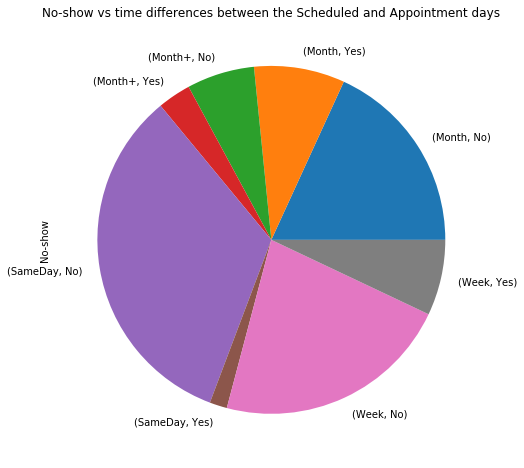

In [38]:
# show relationship between the number of people who showed up with the time difference between the scheduled and appoinment days.
df_noshow.groupby('time_diff_flag') ['No-show'].value_counts().plot(kind='pie', title='No-show vs time differences between the Scheduled and Appointment days',figsize=(8,8));

It seems on the pie chart, the people who booked their appointments on the same day showed up more than the others. Therefore, the best way to show it is hypothesis test to be able to speak statistically.

In [39]:
# Number of people who showed up by time_diff_flag to be used in hypothesis test.
df_noshow.groupby('time_diff_flag') ['No-show'].value_counts()

time_diff_flag  No-show
Month           No         20071
                Yes         9325
Month+          No          6953
                Yes         3425
SameDay         No         36770
                Yes         1792
Week            No         24413
                Yes         7772
Name: No-show, dtype: int64

In [40]:
# Time for Hypothesis Testing
# Population 1: Same day Booking
# Population 2: 1 Week ago Booking
proportion_hyp_test(x1=1792,n1=1792+36771,x2=7772,n2=7772+24413)

Statistically Speaking, Population 2 has significantly higher proportion than Population 1


In [41]:
# lets test week old and month  old
# Population 1: 1 Week ago Booking
# Population 2: 1 month ago Booking
proportion_hyp_test(x1=7772,n1=7772+24413, x2 = 9325,n2=9325+20071)

Statistically Speaking, Population 2 has significantly higher proportion than Population 1


In [42]:
# lets compare month old and and more than 1 month old bookings
# Population 1: 1 month ago Booking
# Population 2: More than month old Booking
proportion_hyp_test(x1 = 9325,n1=9325+20071, x2 = 3425,n2 = 3425+6953)

Statistically Speaking, Population 2 has significantly higher proportion than Population 1


### Answer of Q2
Yes. Above analysis shows that from an statistical view point, we can support with 95% confidence that Peaple who booked an appointment more than a month ago are more likely to miss their appointments as compared to people who booked within a week from their appointments. Similarly, we can also support that people who book an appointment on the same day are more likely to show up compared to people who booked on an earlier date.
Generally speaking, we can say that the older a booking date is, the more likely it becomes for the patients to miss the appointment.

### Q3: How sending or not sending an SMS can impact on missing an appointment?
In this part, we have excluded the same day bookings because no SMS was sent to them. We are going to test if sending an SMS improves the rate at which patients show up to their appointments. We will do that for 3 groups of patients seperately:
- Group 1: Paitients who booked within the last week
- Group 2: Paitients who booked withn the last month
- Group 3: Paitients who booked more than a month ago

In [43]:
# Number of people who showed up by time_diff_flag and SMS_received to be used in hypothesis test.
# Also, there is obvious that the people who booked their appointments at the same day, have not received SMS.
df_noshow.groupby(['time_diff_flag','SMS_received']) ['No-show'].value_counts()

time_diff_flag  SMS_received  No-show
Month           0             No          7651
                              Yes         4221
                1             No         12420
                              Yes         5104
Month+          0             No          2479
                              Yes         1489
                1             No          4474
                              Yes         1936
SameDay         0             No         36770
                              Yes         1792
Week            0             No         15609
                              Yes         5028
                1             No          8804
                              Yes         2744
Name: No-show, dtype: int64

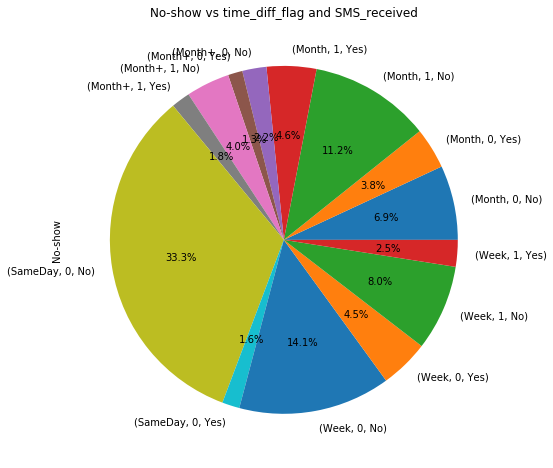

In [44]:
# show relationship between the number of people who showed up with the time_diff_flag and whether they received SMS.
df_noshow.groupby(['time_diff_flag','SMS_received']) ['No-show'].value_counts().plot(kind='pie', title='No-show vs time_diff_flag and SMS_received',autopct='%1.1f%%',figsize=(8,8));

In [45]:
# Time for Hypothesis Testing
# Population 1: 1 week old booking who received SMS
# Population 2: 1 week old booking who DIDN'T received SMS
proportion_hyp_test(x1=2744,n1=2744+8804,x2=5028,n2=5028+15609)

At95% confidence level, Population 1 and Population 2 are not statistically different


In [46]:
# Now lets test 1 month old bookings
# Population 1: 1 month old booking who received SMS
# Population 2: 1 month old booking who DIDN'T received SMS
proportion_hyp_test(x1=5104,n1=5104+12420,x2=4221,n2=4221+7651)

Statistically Speaking, Population 2 has significantly higher proportion than Population 1


In [47]:
# Now lets test more than 1 month old bookings
# Population 1: more than 1 month old booking who received SMS
# Population 2: more than 1 month old booking who DIDN'T received SMS
proportion_hyp_test(x1=1936,n1=1936+4474,x2=1489,n2=1489+2479)

Statistically Speaking, Population 2 has significantly higher proportion than Population 1


### Answer of Q3
The results are very interesting:
- Receiving a message (SMS) didn't decrease the No-show rate for patients who have booked within the last week. However it has decreased the No-show rate among the patients who have booked their appointment more than a week in advance ( Month and Month+).
- In conclusion, the clinic can save some money by not sending SMS to those who have booked within the last week.
- Instead, they can invest in sending SMS to those patients who have booked within the last month or earlier to decrease their no show rate.

<a id='conclusions'></a>
## Conclusions

This dataset is aquired over a few monthes in clinics in Brasil. Since the data doesn't span over at least one year, we can't see the potential seasonal health issues. Beside that, there dosnt seem to be any other issue with the sample.

Similar to any other statistical inference, we are using a sample to make inferences about the population. Below conclusions are based on a 95% confidence interval hypothesis testing of different featurs in the dataset.It is imparitive to remember that there is a 5% chance that a different dataset would result in a different set of conclusions. 

In conclusion, and with the caveats mentioned above, we observed that he following factors are imporant for us in order to predict if the patient would show up:

- Time difference between scheduled and appointment dates
- Alcholism
- Diabetes
- Having Scholarship or not
- Hypertension

Based on the available dataset we have also noticed that statistically speaking, patients who have 2 or 3 problems( alcoholism, Diabetes and lack of scholarship) whould have a better show up rate than others. 

We also concluded that receiving an SMS would improve the rate of show-up for patients who made their appointments more than one week in advance.